In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from google.colab import files
uploaded = files.upload()

Saving updated_pollution_dataset.csv to updated_pollution_dataset.csv


In [3]:
data = pd.read_csv('updated_pollution_dataset.csv')
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
print("Jumlah baris:", data.shape[0])
print("Jumlah kolom:", data.shape[1])

Jumlah baris: 5000
Jumlah kolom: 10


In [5]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


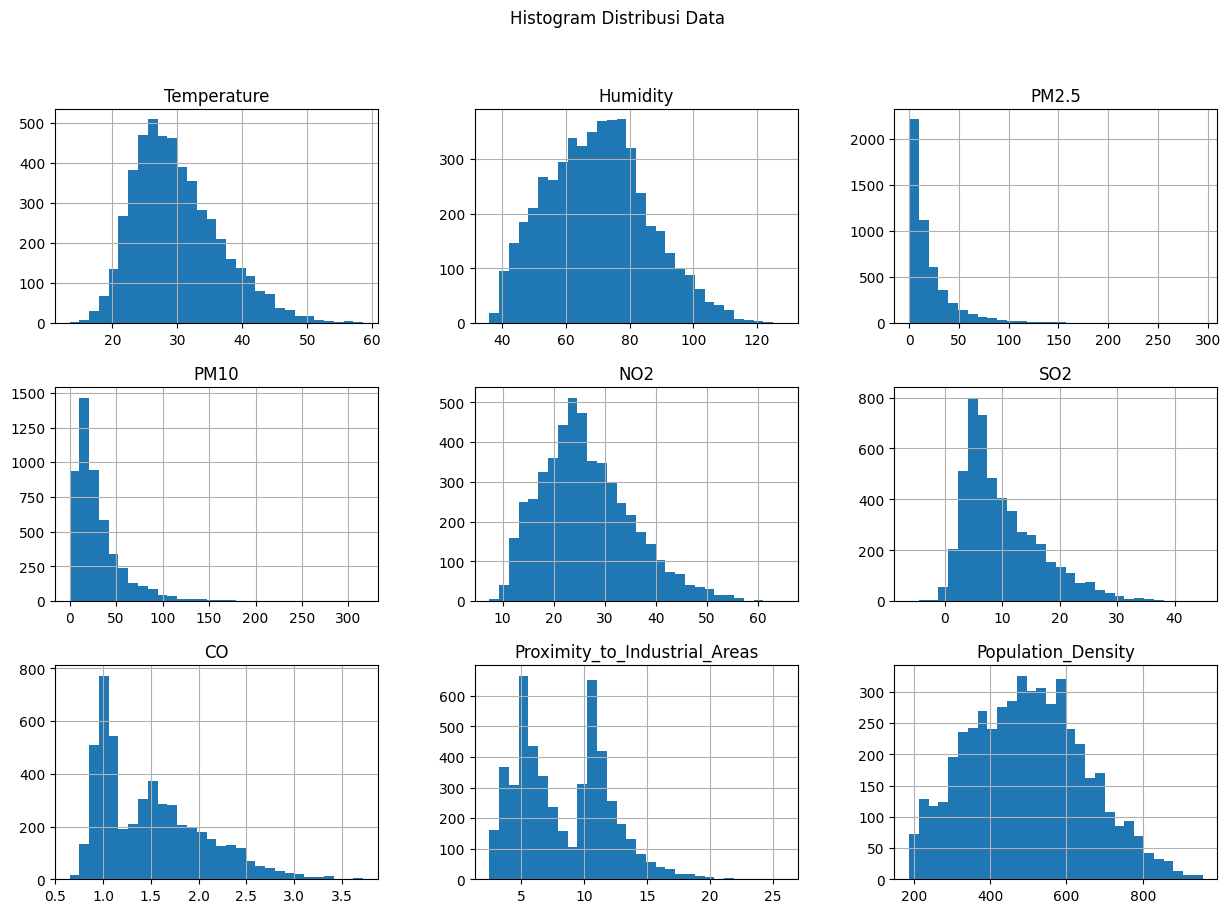

In [7]:
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram Distribusi Data')
plt.show()

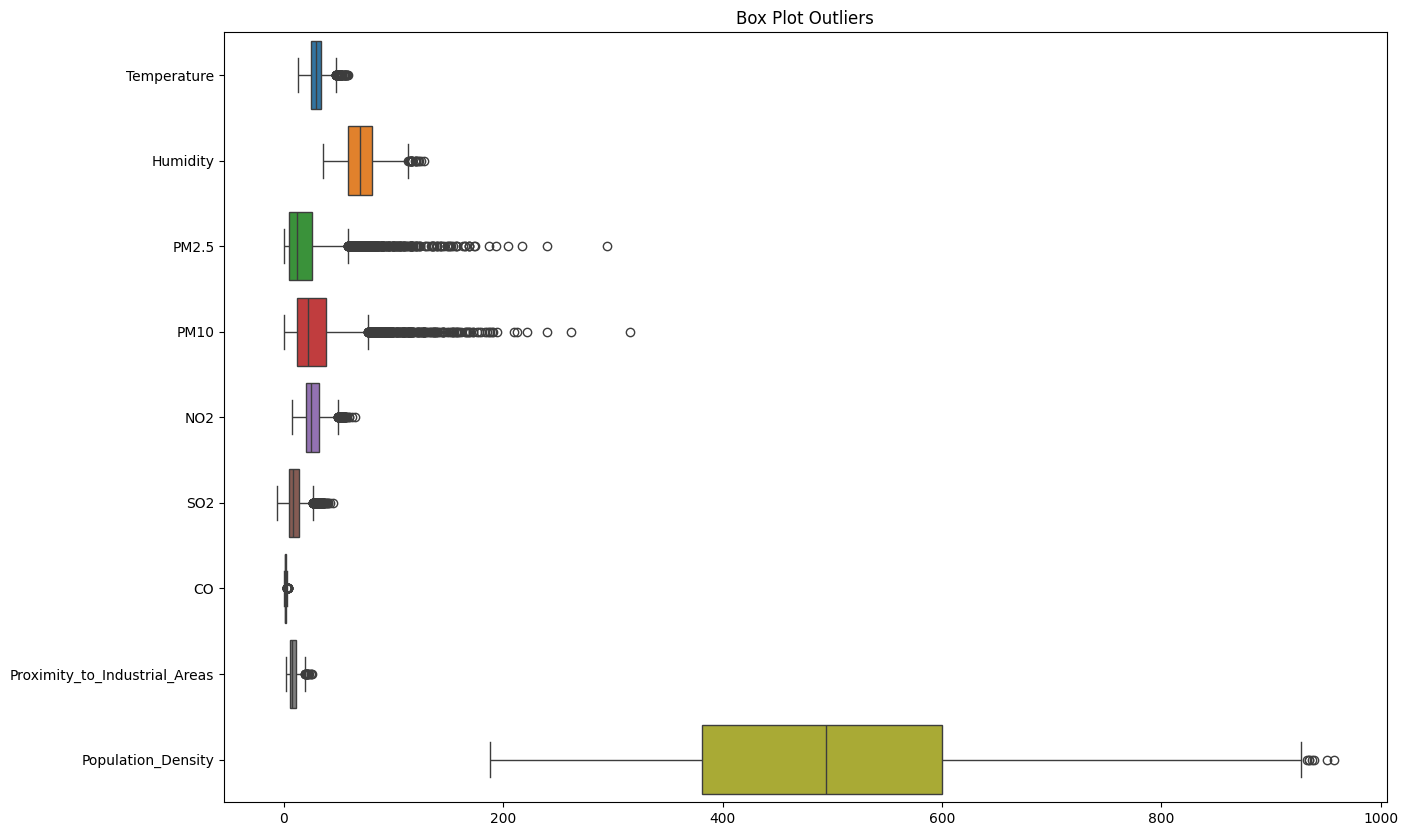

In [8]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include='number'), orient='h')
plt.title('Box Plot Outliers')
plt.show()

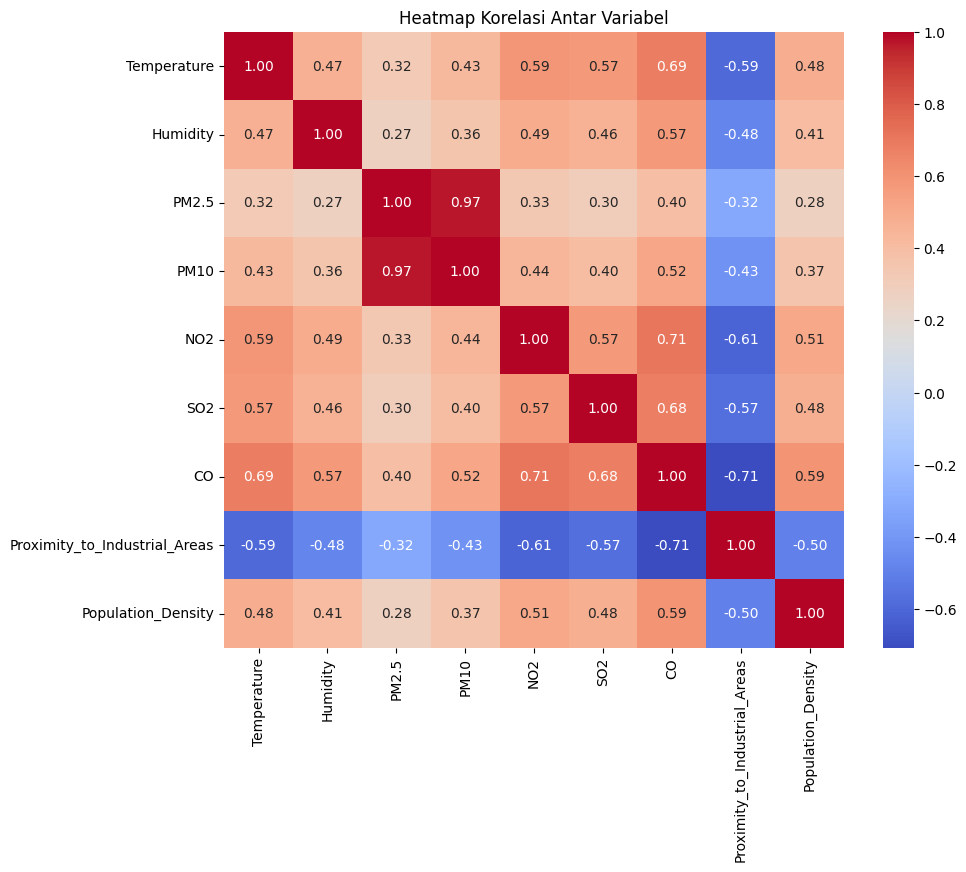

In [9]:
data_numeric = data.select_dtypes(include='number')
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

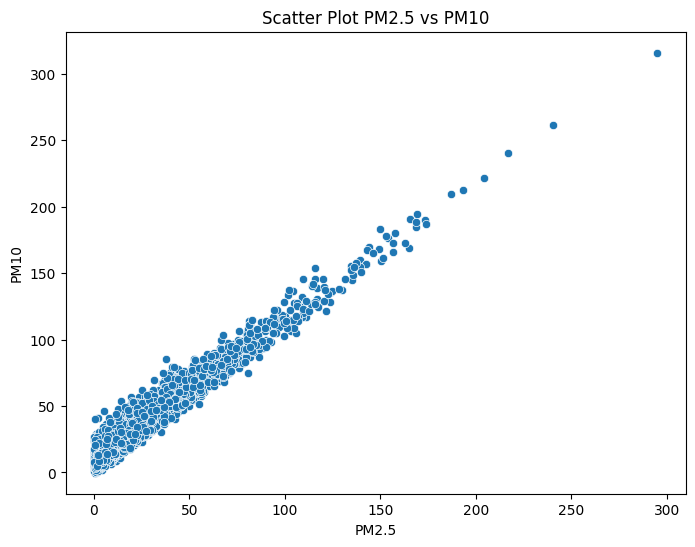

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM2.5', y='PM10', data=data)
plt.title('Scatter Plot PM2.5 vs PM10')
plt.show()

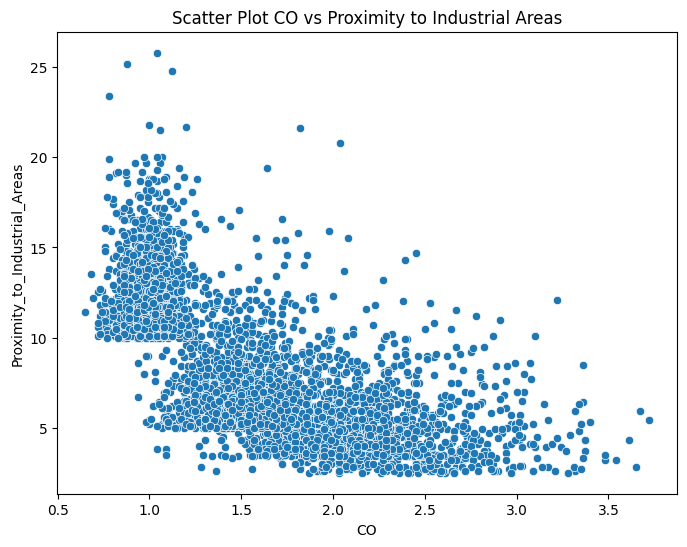

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CO', y='Proximity_to_Industrial_Areas', data=data)
plt.title('Scatter Plot CO vs Proximity to Industrial Areas')
plt.show()

In [12]:
missing_values = data.isnull().sum()
print("\nJumlah Missing Values:\n", missing_values)


Jumlah Missing Values:
 Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [13]:
print(data.duplicated().sum())

0


In [14]:
data_numeric = data.select_dtypes(include='number')
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data_numeric < lower_bound) | (data_numeric > upper_bound)).sum()
print("\nJumlah Outliers:\n", outliers)


Jumlah Outliers:
 Temperature                       72
Humidity                          19
PM2.5                            352
PM10                             324
NO2                               73
SO2                              124
CO                                45
Proximity_to_Industrial_Areas     16
Population_Density                 7
dtype: int64


In [15]:
numerical_columns = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
robust_scaler = RobustScaler()
data_scaled = data.copy()
data_scaled[numerical_columns] = robust_scaler.fit_transform(data[numerical_columns])

In [16]:
le = LabelEncoder()
data_scaled['Air Quality'] = le.fit_transform(data_scaled['Air Quality'])

In [17]:
data_scaled['PM2.5_to_PM10_Ratio'] = data_scaled['PM2.5'] / (data_scaled['PM10'] + 1e-6)

In [18]:
skewed_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']
for feature in skewed_features:
    print(f"{feature} - Minimum value: {data[feature].min()}")

PM2.5 - Minimum value: 0.0
PM10 - Minimum value: -0.2
NO2 - Minimum value: 7.4
SO2 - Minimum value: -6.2
CO - Minimum value: 0.65


In [19]:
for feature in skewed_features:
    data = data[data[feature] > 0]

In [20]:
for feature in skewed_features:
    data[feature] = np.log1p(data[feature])

Model: Logistic Regression
Accuracy: 0.9480
Precision: 0.9490
Recall: 0.9480
F1 Score: 0.9480
Confusion Matrix:
[[409   0   0   0]
 [  0  91   0  20]
 [  0   0 282  12]
 [  0   8  12 166]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.92      0.82      0.87       111
           2       0.96      0.96      0.96       294
           3       0.84      0.89      0.86       186

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000


--------------------------------------------------

Model: Random Forest
Accuracy: 0.9560
Precision: 0.9558
Recall: 0.9560
F1 Score: 0.9558
Confusion Matrix:
[[409   0   0   0]
 [  0  97   0  14]
 [  0   0 286   8]
 [  0  10  12 164]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      

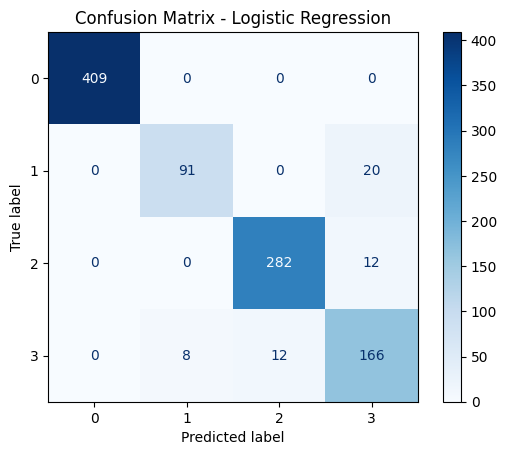

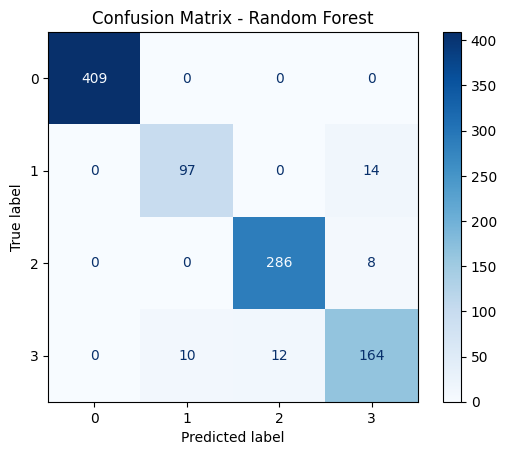

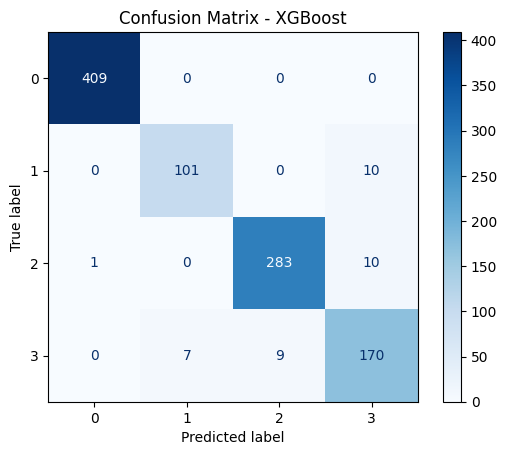

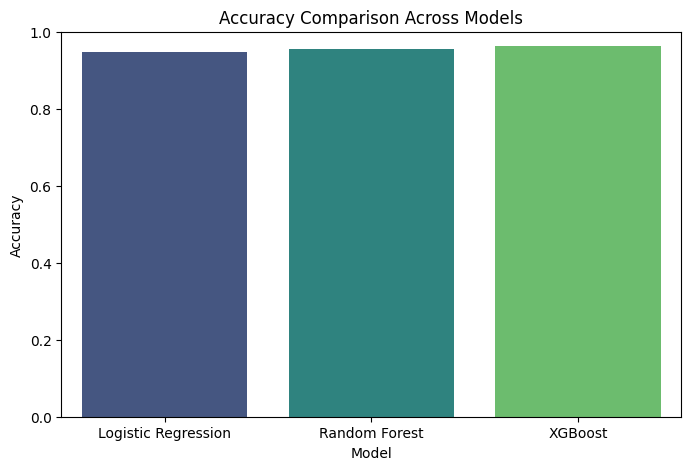

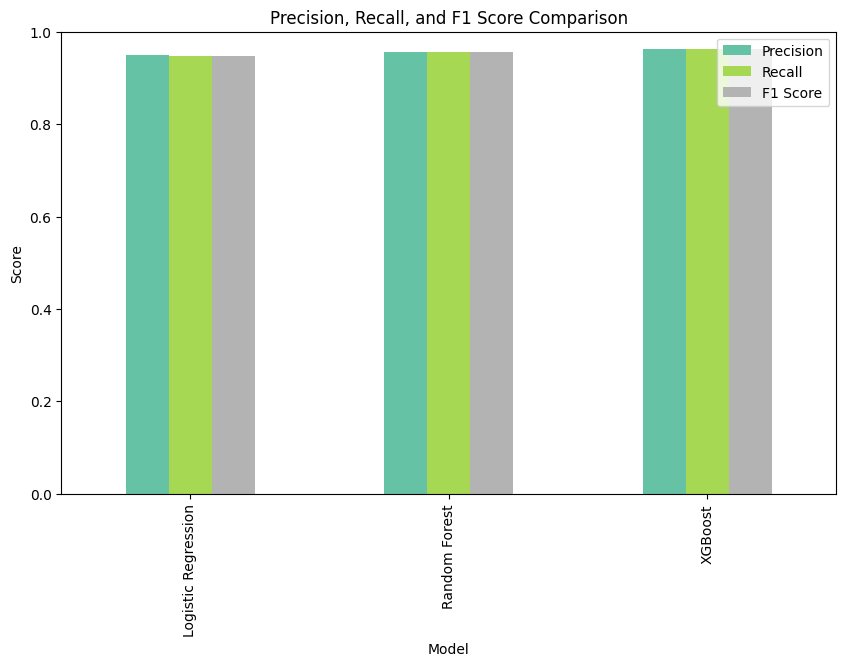

In [21]:
# 1. Prepare the data (features and target)
X = data_scaled.drop('Air Quality', axis=1)
y = data_scaled['Air Quality']

# 2. Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter = 500000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

# 4. Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Explicitly calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Print the results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("\n" + "-"*50 + "\n")



# Visualize Confusion Matrix for each model
for model_name, model in models.items():

    disp = ConfusionMatrixDisplay(confusion_matrix=results[model_name]['confusion_matrix'], display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Bar Chart for Accuracy Comparison
model_names = list(results.keys())
accuracy_scores = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracy_scores, hue=model_names, palette='viridis', legend=False)
plt.title('Accuracy Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Bar Chart for Precision, Recall, and F1 Score
precision_scores = [result['precision'] for result in results.values()]
recall_scores = [result['recall'] for result in results.values()]
f1_scores = [result['f1_score'] for result in results.values()]

# Create a DataFrame to display results
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

metrics_df.set_index('Model', inplace=True)

# Plot the results
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Precision, Recall, and F1 Score Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

In [22]:
new_data_raw = pd.DataFrame([{
    'Temperature': 30,
    'Humidity': 70,
    'PM2.5': 60,
    'PM10': 80,
    'NO2': 40,
    'SO2': 25,
    'CO': 1.2,
    'Proximity_to_Industrial_Areas': 5,
    'Population_Density': 3000
}])

skewed_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']
for feature in skewed_features:
    new_data_raw[feature] = np.log1p(new_data_raw[feature])

numerical_columns = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
                     'Proximity_to_Industrial_Areas', 'Population_Density']
new_data_scaled_numeric = robust_scaler.transform(new_data_raw[numerical_columns])

pm25_original = np.expm1(new_data_raw['PM2.5'])
pm10_original = np.expm1(new_data_raw['PM10'])
pm_ratio = (pm25_original / (pm10_original + 1e-6)).values.reshape(-1, 1)

from numpy import hstack
new_data_final = hstack([new_data_scaled_numeric, pm_ratio])

predicted_encoded = models['Random Forest'].predict(new_data_final)

predicted_label = le.inverse_transform(predicted_encoded)

print(f"Prediksi kategori Air Quality: {predicted_label[0]}")

Prediksi kategori Air Quality: Moderate


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
